In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
print(X_train)
y_train = np.array([460, 232, 178])
print(f"Y_train:-{y_train}")

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y_train:-[460 232 178]


In [13]:
# 𝑏 is a scalar parameter.
b_init = 685.18113679 
# w is a vector with n elements
w_init = np.array([ 0.32133535, 42.75376741, -31.36032453, -25.42131618])

### Model prediction with Multiple Variable
The model's prediction with the multiple variable is given by the linear model:
$$ f_{\mathbf{w},b}(\mathbf{x}) = w_0x_0 + w_1x_1 + ... + w_{n-1}x_{n-1} + b$$
or in vector form the equation written as:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$ 

In [24]:
# Single prediction element by element
def predict(x, w, b): 
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [26]:
# Take a row from X_train
X_temp = X_train[0,:]
f_wb = predict(X_temp,w_init,b_init)
print(f"f_wb = {f_wb}")

f_wb = 399.71999761000006


In [30]:
# use of dot product
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p 

X_temp = X_train[0,:]
f_wb = predict(X_temp,w_init,b_init)
print(f"f_wb = {f_wb}")

f_wb = 399.71999760999995


### Computing Cost with multiple variables
The equation for the cost in one variable:
$$J(w,b) =  \frac{1}{2m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$

In [44]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b   
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * m)                          
    return cost
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost : {cost}')

Cost : 1413.0904901729366


### Compute gradient with multiple variables
$$\begin{align*} \text{repeat}&\text{until convergence:} \; \lbrace \newline\; w &= w - \alpha \frac{\partial J(w,b)}{\partial w_j} \newline b &= b - \alpha \frac{\partial J(w,b)}{\partial b} \newline \rbrace \end{align*}$$

where parameters $w$ , $b$ are updated simultaneously
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w_j} &= \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})- y^{(i)})x^{(i)} \\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})- y^{(i)})
\end{align}
$$

In [48]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
    return dj_db, dj_dw

#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -52.680001683333366
dj_dw at initial w,b: 
 [-7.81467761e+04 -1.80013340e+02 -6.70533356e+01 -2.11660007e+03]


Iteration 0: Cost = 2.659353644300759
Iteration 100: Cost = 0.07909536679527501
Iteration 200: Cost = 0.03183688883735544
Iteration 300: Cost = 0.014488810010290853
Iteration 400: Cost = 0.008056267133466565
Iteration 500: Cost = 0.0056594801154898795
Iteration 600: Cost = 0.004764339226311325
Iteration 700: Cost = 0.0044296529170259604
Iteration 800: Cost = 0.004304449774056865
Iteration 900: Cost = 0.004257600567557819
Final parameters: [2.94494286 1.99183836] 0.02385975274196557


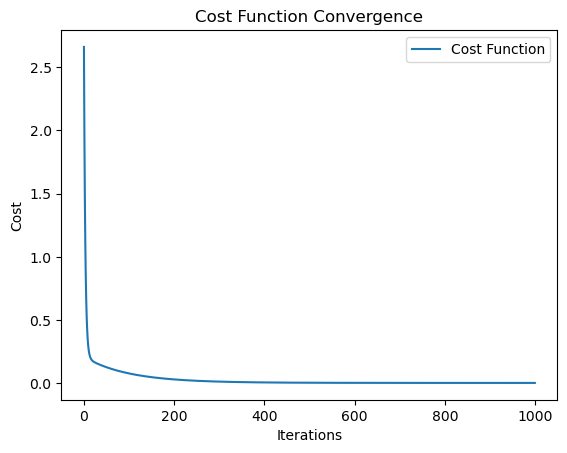

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient(X, y, w, b):
    m, n = X.shape  # (number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    
    dj_dw /= m
    dj_db /= m
    
    return dj_db, dj_dw

def gradient_descent(X, y, w, b, alpha, num_iters):
    cost_history = []
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f'Iteration {i}: Cost = {cost}')
    
    return w, b, cost_history

def compute_cost(X, y, w, b):
    m = len(y)
    cost = np.sum(((X @ w + b) - y) ** 2) / (2 * m)
    return cost

# Example usage
np.random.seed(0)
X_train = np.random.rand(100, 2)
y_train = 3 * X_train[:, 0] + 2 * X_train[:, 1] + np.random.randn(100) * 0.1
w_init = np.zeros(X_train.shape[1])
b_init = 0.0
alpha = 0.1
num_iters = 1000

w_final, b_final, cost_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters)
print("Final parameters:", w_final, b_final)

# Plot cost function history
plt.plot(range(num_iters), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.show()


### Feature Scaling
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization : $x_i := \dfrac{x_i - \mu_i}{max-min} $

### Z-score normalization
After Z-score normalization ,all features will have a mean of 0 and a standard deviation of 1.
$$ x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$ \begin{align} 
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

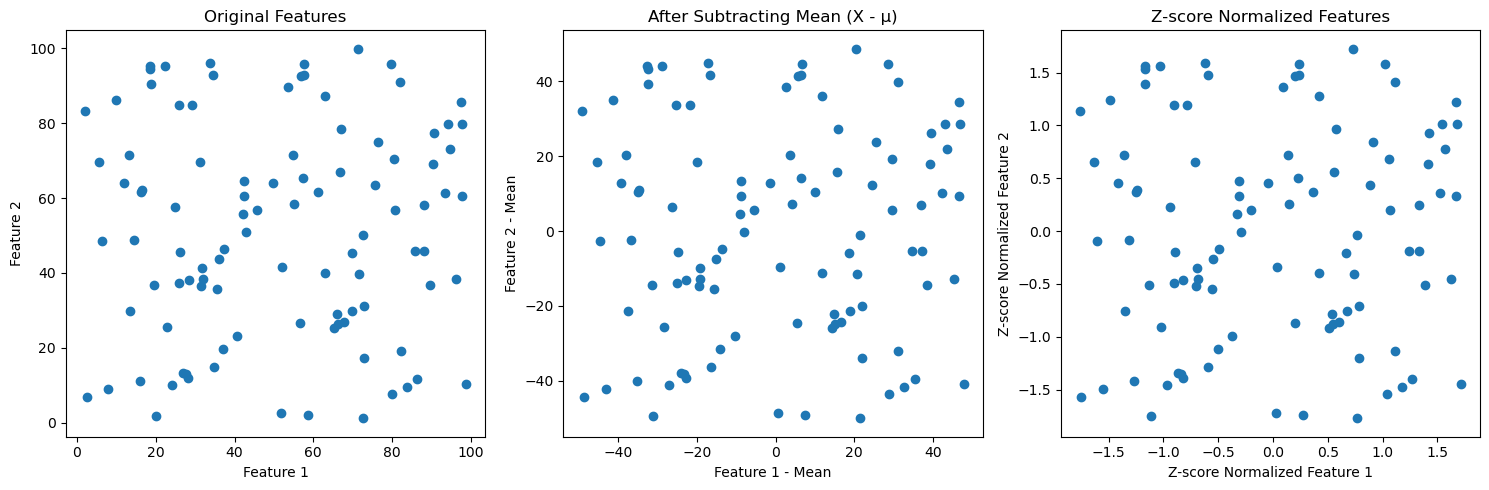

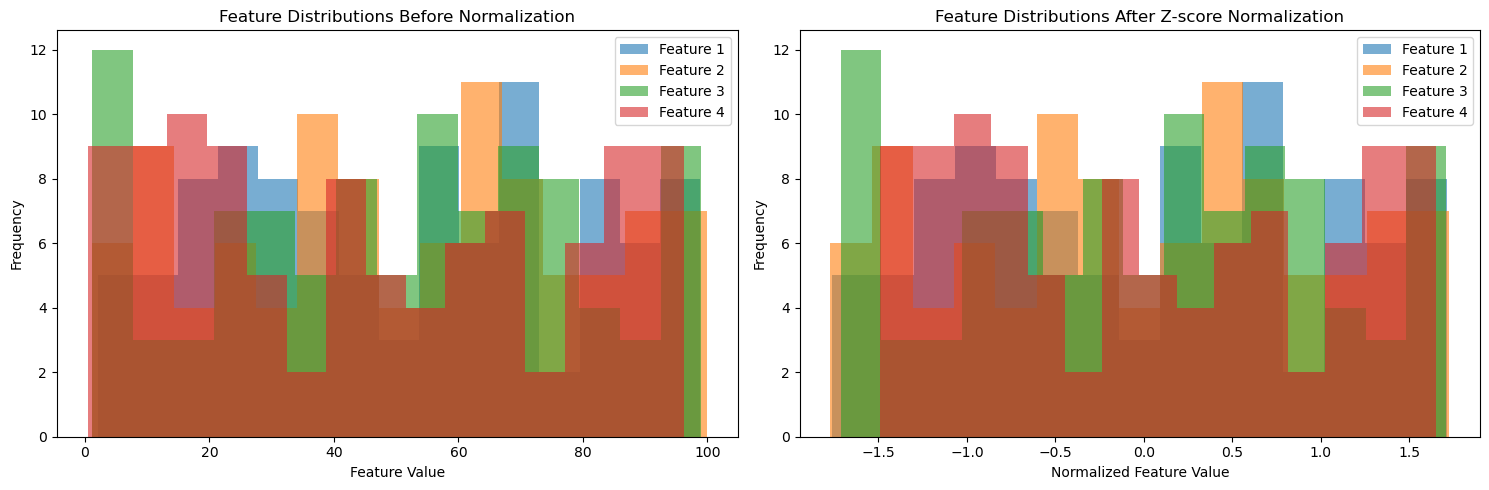

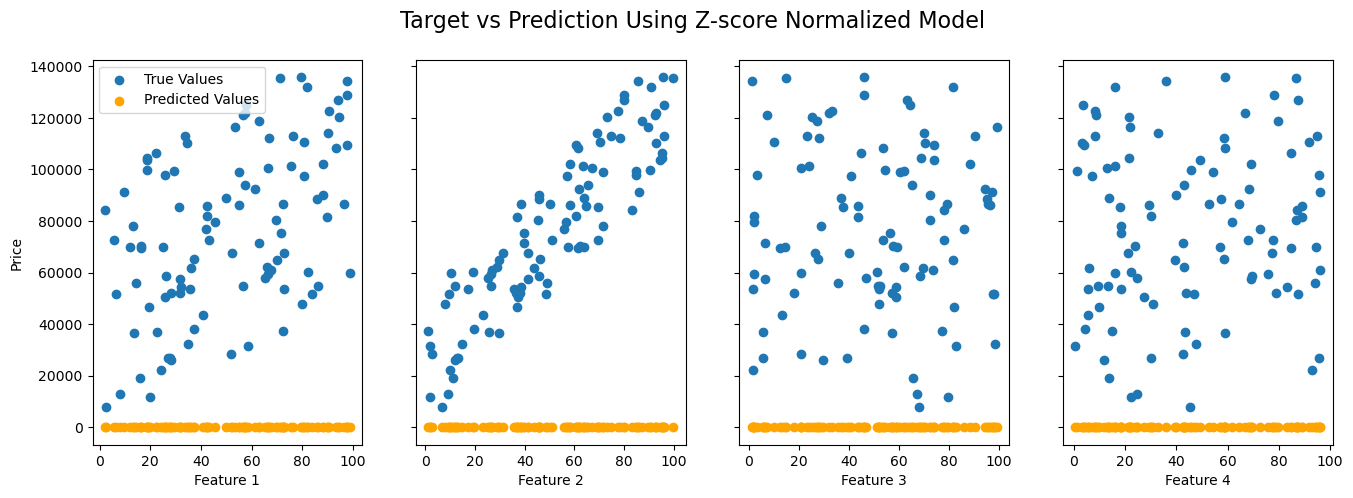

Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old: $27803


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Function to Z-score normalize features
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)  # Mean of each feature
    sigma = np.std(X, axis=0)  # Standard deviation of each feature
    X_norm = (X - mu) / sigma  # Normalize by subtracting mean and dividing by std
    return X_norm, mu, sigma

# Generate synthetic data (for example, housing data)
np.random.seed(0)
X_train = np.random.rand(100, 4) * 100  # 100 samples, 4 features
y_train = X_train[:, 0] * 500 + X_train[:, 1] * 1000  # Fake price based on the first two features

# Apply Z-score normalization
X_norm, mu, sigma = zscore_normalize_features(X_train)

# Plot original features, features after subtracting mean (X - mu), and Z-score normalized features
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(X_train[:, 0], X_train[:, 1])
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].set_title("Original Features")

ax[1].scatter(X_train[:, 0] - mu[0], X_train[:, 1] - mu[1])
ax[1].set_xlabel("Feature 1 - Mean")
ax[1].set_ylabel("Feature 2 - Mean")
ax[1].set_title("After Subtracting Mean (X - μ)")

ax[2].scatter(X_norm[:, 0], X_norm[:, 1])
ax[2].set_xlabel("Z-score Normalized Feature 1")
ax[2].set_ylabel("Z-score Normalized Feature 2")
ax[2].set_title("Z-score Normalized Features")

plt.tight_layout()
# fig.suptitle("Feature Scaling and Z-score Normalization", fontsize=16)
plt.show()

# Plot histograms for the features before and after normalization
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Histograms before normalization
for i in range(X_train.shape[1]):
    ax[0].hist(X_train[:, i], bins=15, alpha=0.6, label=f'Feature {i+1}')
ax[0].set_title("Feature Distributions Before Normalization")
ax[0].set_xlabel("Feature Value")
ax[0].set_ylabel("Frequency")
ax[0].legend()

# Histograms after Z-score normalization
for i in range(X_norm.shape[1]):
    ax[1].hist(X_norm[:, i], bins=15, alpha=0.6, label=f'Feature {i+1}')
ax[1].set_title("Feature Distributions After Z-score Normalization")
ax[1].set_xlabel("Normalized Feature Value")
ax[1].set_ylabel("Frequency")
ax[1].legend()

plt.tight_layout()
# fig.suptitle("Distributions of Features Before and After Normalization", fontsize=16)
plt.show()

# Predicting with a model after normalization (simple linear regression example)
# Let's pretend w_norm and b_norm are obtained from a linear regression model.
w_norm = np.random.randn(4)
b_norm = np.random.randn()

# Predicting using normalized data
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# Plot predictions vs target (y_train) vs original features
fig, ax = plt.subplots(1, 4, figsize=(16, 5), sharey=True)
for i in range(X_train.shape[1]):
    ax[i].scatter(X_train[:, i], y_train, label='True Values')
    ax[i].scatter(X_train[:, i], yp, color='orange', label='Predicted Values')
    ax[i].set_xlabel(f"Feature {i+1}")
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target vs Prediction Using Z-score Normalized Model", fontsize=16)
plt.show()

# Example for predicting with a specific new input (house data)
x_house = np.array([1200, 3, 1, 40])  # Example: 1200 sqft, 3 bedrooms, 1 floor, 40 years old
x_house_norm = (x_house - mu) / sigma  # Normalize the new input
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm  # Predict the price using the model
print(f"Predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old: ${x_house_predict*1000:0.0f}")
